In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
import sklearn.preprocessing

import wrangle as w

In [2]:
df = w.get_data(filename="ds_salaries.csv")

In [3]:
df.shape

(3755, 11)

In [4]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [6]:
# no nulls 
df.isnull().sum()


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df.experience_level.value_counts()

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

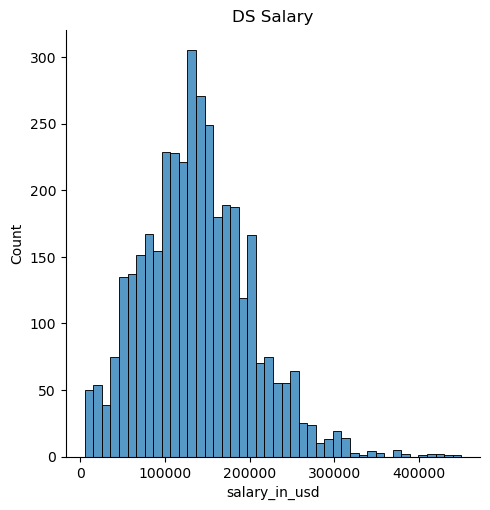

In [8]:
# visualize distribution
sns.displot(x='salary_in_usd', data=df)

plt.title('DS Salary')
plt.show()

In [9]:
object_col = w.get_object_cols(df)

In [10]:
num_col = w.get_numeric_cols(df)

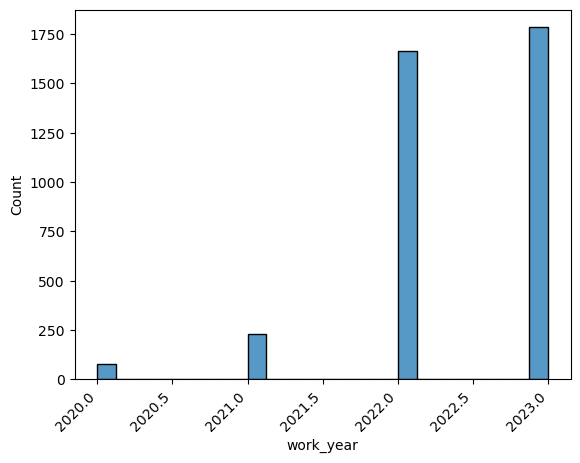

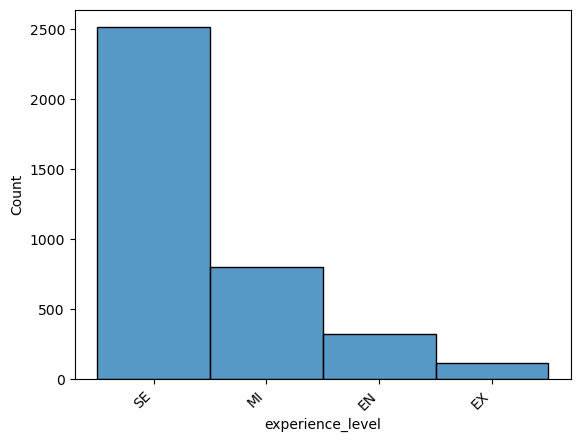

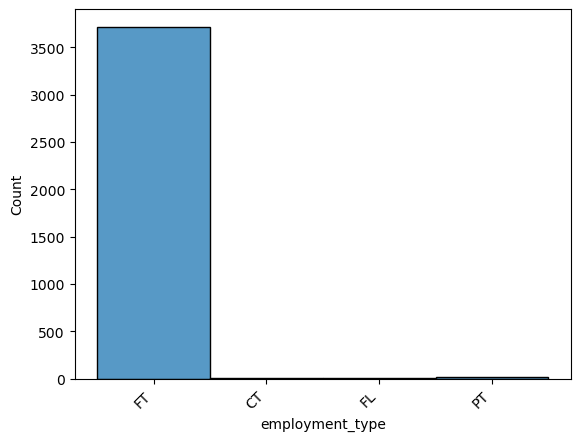

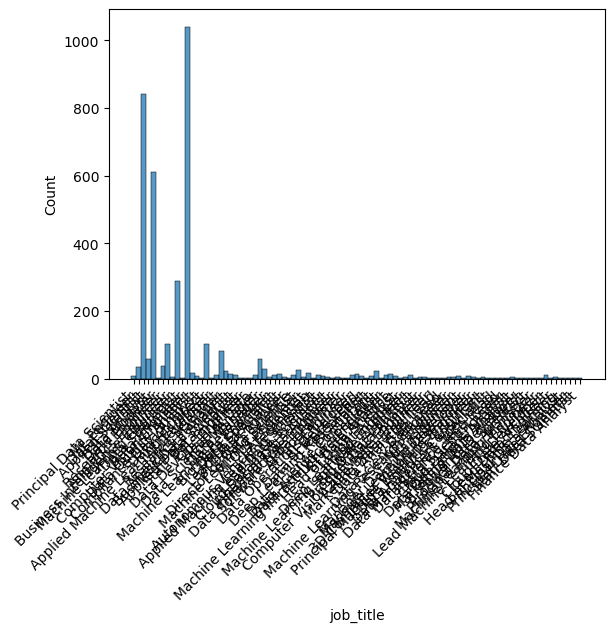

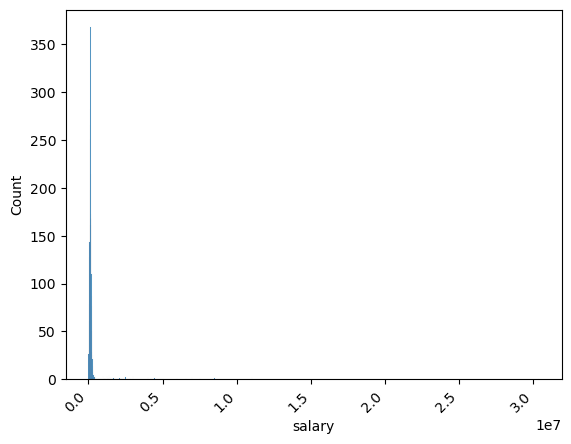

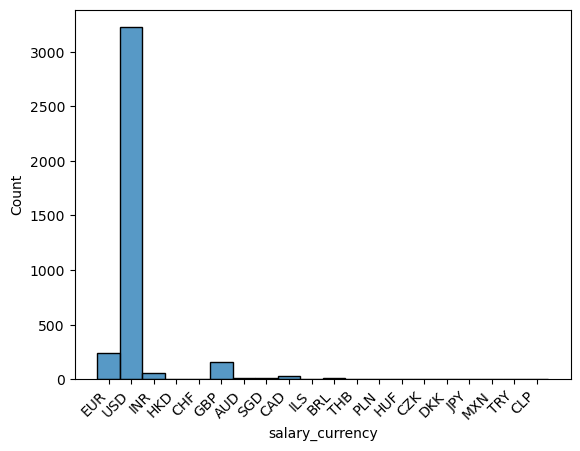

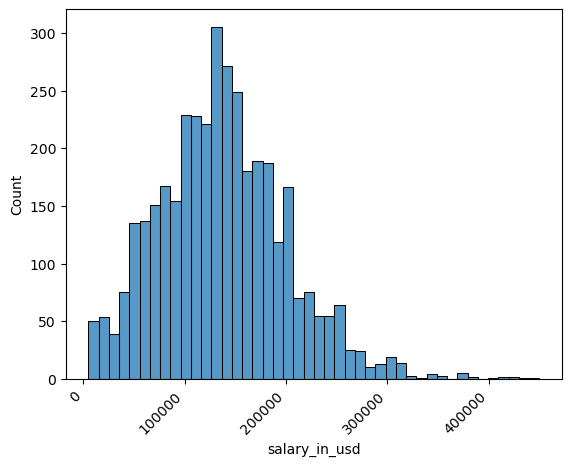

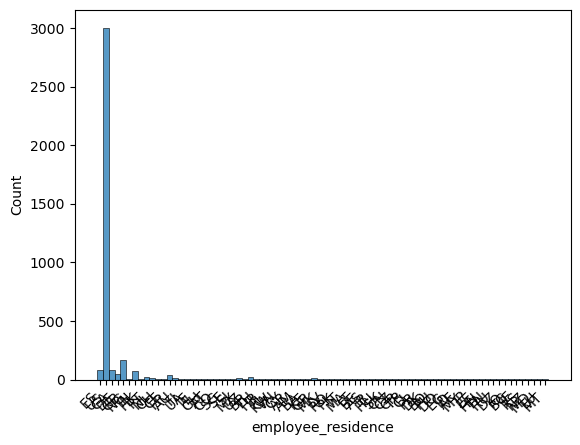

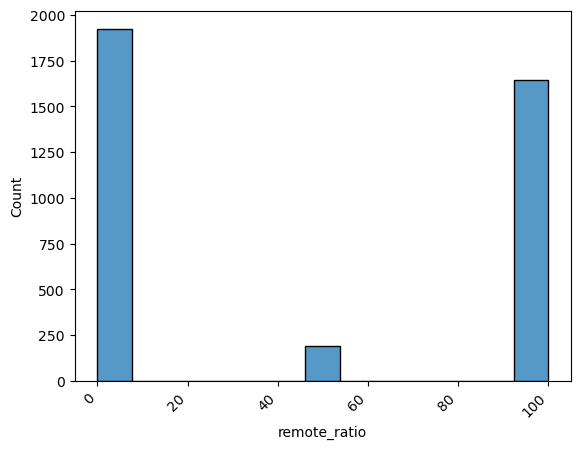

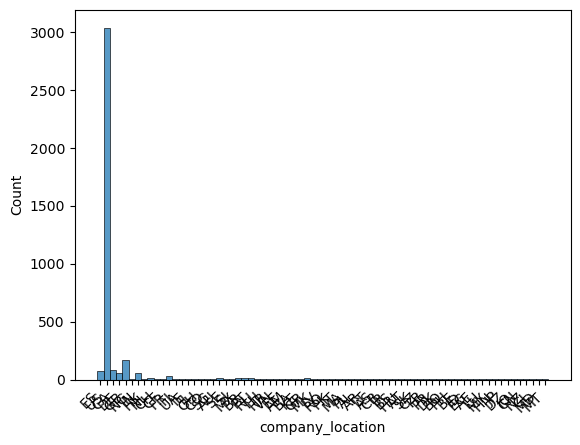

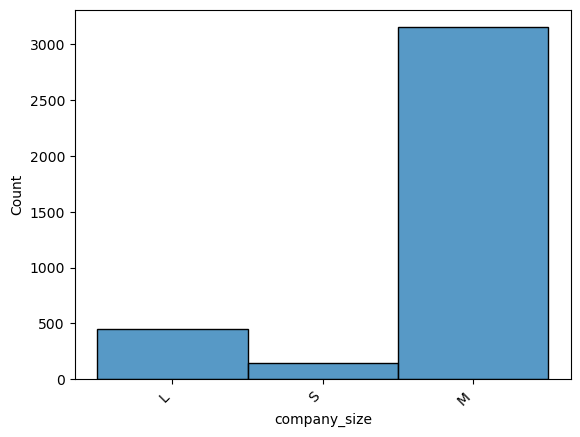

In [11]:
w.plot_histograms(df)

* majority of data is from year 2022 and 2023
* experienc level: SE (senior executive???) is majority 
* employment time: majority FT (full-time??)
* job title: data engineer majority
* salary currency is majority USD    3224, may drop remaining 
* salary: 100-150k bulk
* employee residence: US majority 3004
* remote ratio: not sure what 0 means (not remote??) (1= remote????)
* company_location: US 3040, drop other countires
* company size: Large, small, medium (large bulk)

In [30]:
# kept only employees that reside in the US
df = df[df["employee_residence"] == "US"]

In [32]:
# salary currency only in USD
df.salary_currency.value_counts().head(10)

USD    3004
Name: salary_currency, dtype: int64

In [52]:
df.job_title.value_counts().head(5)

Data Engineer                903
Data Scientist               667
Data Analyst                 519
Machine Learning Engineer    218
Data Architect                97
Name: job_title, dtype: int64

In [54]:
# keeping only the top 5 jobs
top_five = ['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Data Architect']

In [60]:
df = df[df["job_title"].isin(top_five)]

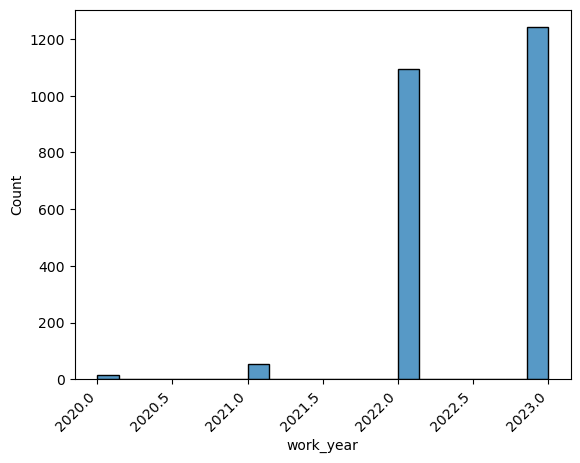

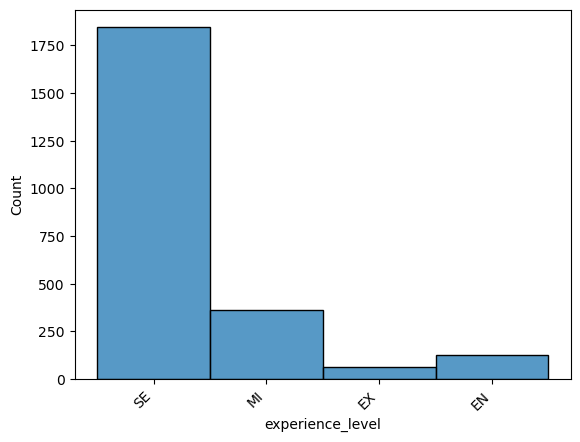

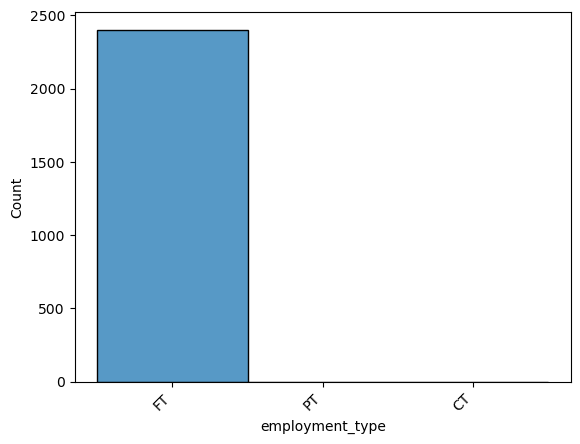

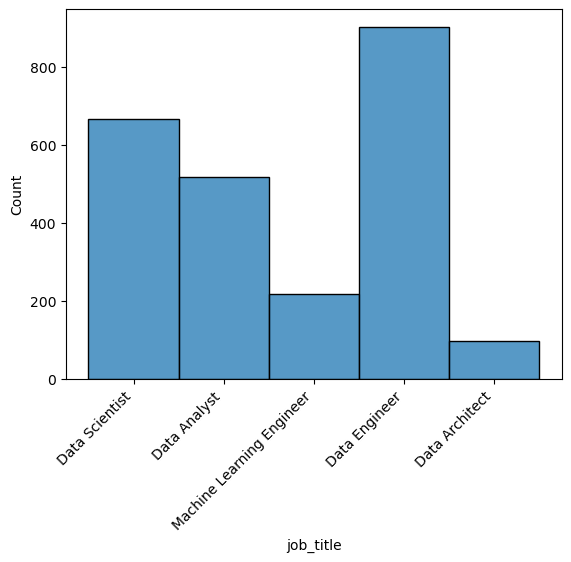

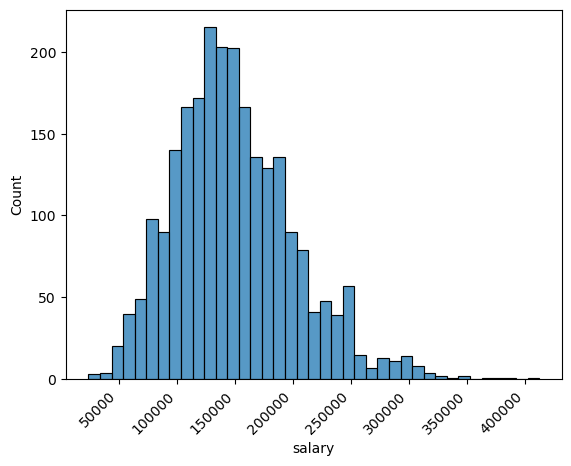

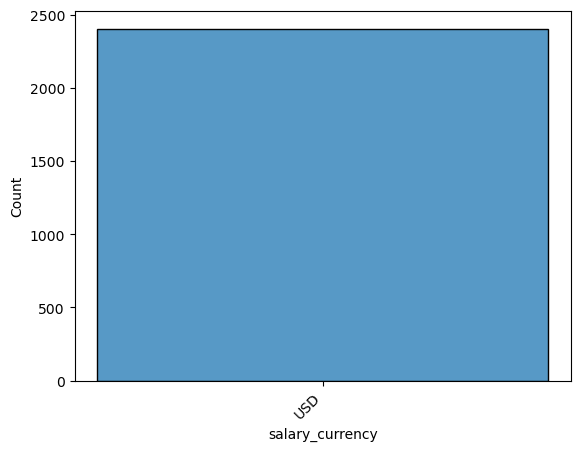

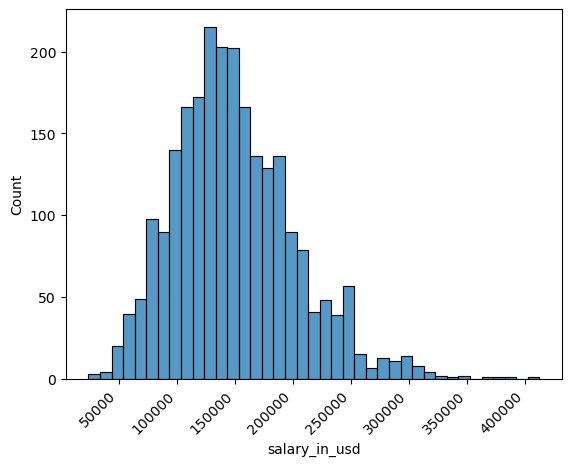

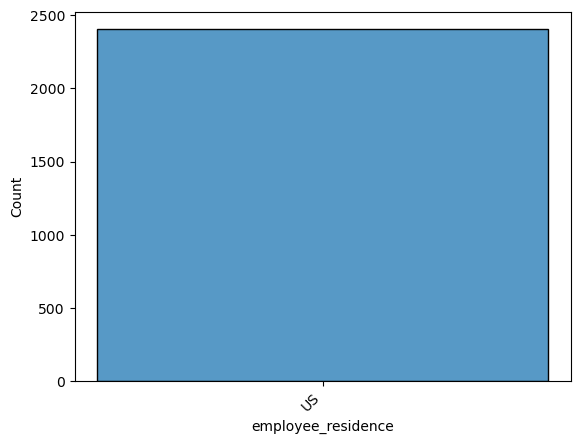

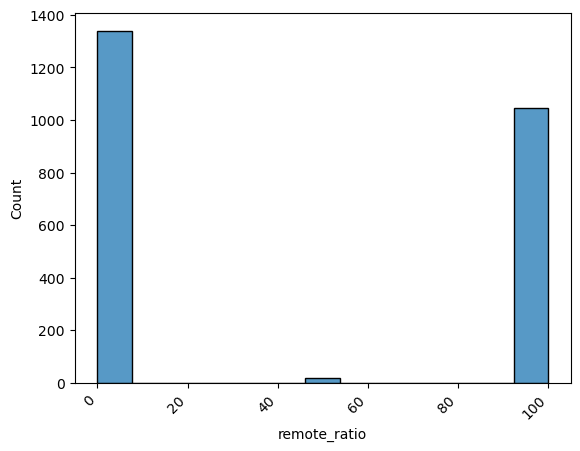

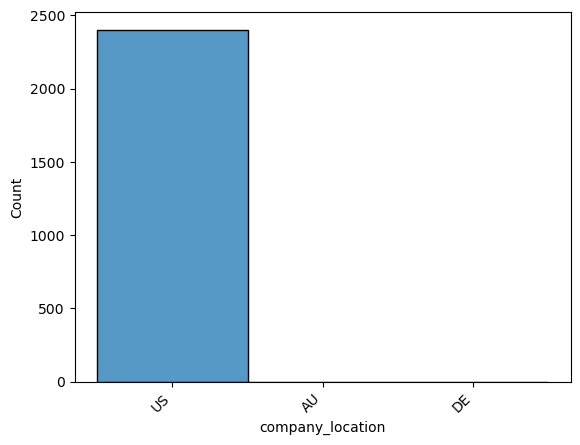

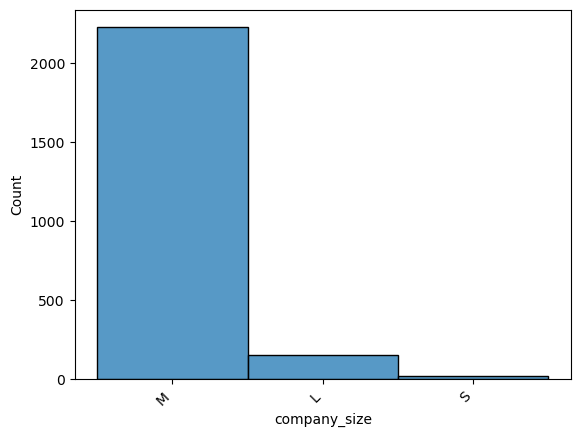

In [61]:
w.plot_histograms(df)

In [64]:
df.remote_ratio.value_counts()

0      1339
100    1046
50       19
Name: remote_ratio, dtype: int64

In [72]:
df.employment_type.value_counts()

FT    2402
PT       1
CT       1
Name: employment_type, dtype: int64

In [82]:
# tables to drop 
df.salary_currency.value_counts()
df.employee_residence.value_counts()
df.employment_type.value_counts() #  drop but filter out for only FT -- full-time 
# salary_in_usd

FT    2402
Name: employment_type, dtype: int64

In [84]:
# filter FT 
df = df[df["employment_type"] == "FT"]
df = df.drop(columns=(["salary_currency", "employee_residence", "employment_type"]))

In [88]:
df = df.drop(columns=(["salary_in_usd"]))

In [90]:
# new shape
df.shape

(2402, 7)

In [91]:
# still no nulls 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2402 entries, 9 to 3752
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         2402 non-null   int64 
 1   experience_level  2402 non-null   object
 2   job_title         2402 non-null   object
 3   salary            2402 non-null   int64 
 4   remote_ratio      2402 non-null   int64 
 5   company_location  2402 non-null   object
 6   company_size      2402 non-null   object
dtypes: int64(3), object(4)
memory usage: 150.1+ KB


# split data 

In [92]:
train, validate, test = w.split_data(df)

In [93]:
train

,work_year,experience_level,job_title,salary,remote_ratio,company_location,company_size
2434,2022,MI,Machine Learning Engineer,130000,0,US,M
3421,2022,MI,Machine Learning Engineer,120000,100,US,S
2247,2022,SE,Data Engineer,200000,0,US,M
2201,2022,SE,Data Engineer,191200,0,US,M
2059,2022,SE,Data Analyst,95000,0,US,M
...,...,...,...,...,...,...,...
452,2023,SE,Data Engineer,114500,0,US,M
1042,2023,SE,Data Engineer,153600,0,US,M
1532,2023,SE,Data Engineer,129000,0,US,M
3013,2022,SE,Machine Learning Engineer,129300,0,US,M


# Explore 

In [ ]:
* predict salary 

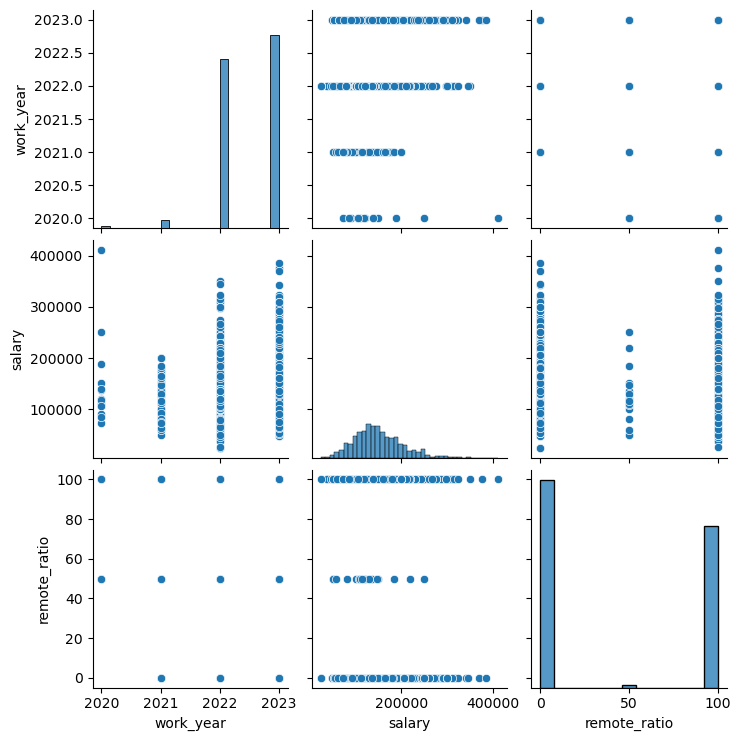

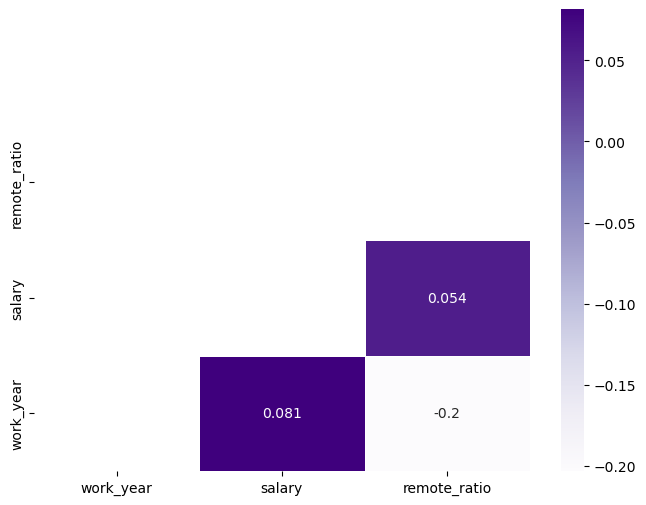

In [97]:
train_corr = train.corr()

plt.figure(figsize=(8,6))
sns.heatmap(train_corr, cmap='Purples', annot=True, linewidth=0.5, mask= np.tril(train_corr))
plt.ylim(0, 4)

plt.show()